In [1]:
# imports

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import MDS, TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

plot_style = {
    # For latex-quality, i.e., publication quality legends and labels on graphs.
    # Warning: you must have installed LaTeX on your system. Else set it to False.
    "text.usetex": True, 
    
    # configure fonts
    "font.size":12,             # default font size
    "font.family":'serif',
    "legend.fontsize": 10,
    "axes.labelsize": 12,
    "axes.titlesize":14,
    "xtick.labelsize" : 8,
    "ytick.labelsize" : 8,
    
    # configure figure
    "figure.dpi": 144,
    "figure.figsize":'10,5',
    "figure.titlesize":14
}

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

In [3]:
n, d = X_train.shape

In [4]:
X_test.shape

(1108, 20000)

In [5]:
features_by_max = np.load('features_by_max_fully_trained.npy')

In [6]:
X_train = np.log2(X_train+1)
X_test = np.log2(X_test+1)

In [7]:
features_by_max

array([16631, 11217, 12699,  8543, 19288,  8759, 17020, 16916, 18292,
       13877, 16039, 10886, 16385,  2712, 15682, 18178,  5048,  7206,
       12927, 18000, 13890, 13683, 16531, 11774, 19005, 13054, 18500,
       18850, 12448, 13260, 16928,  3271, 15617,  8127, 14278, 14664,
       15235, 13065, 19712, 15533, 13939,  5057, 18885, 16606,  6366,
       14306,  9417, 16509,  8804, 15859, 10109,  5549, 18253,  3328,
        9619, 12784, 13671, 18788,  3373, 18510, 18896, 11218,  5092,
        9530, 12027, 15632, 14852,  9652, 19401,  5686, 12629,  9912,
        5412, 10486,  3453,  9725, 15676, 19085, 14702, 13047, 14039,
       12518,  6854,  7379, 11011, 18809, 11759, 18317,  2000,  9076,
       18572, 11933,  5034, 14675, 16053, 16014,  5834, 15129,  5062,
        7380], dtype=int64)

In [8]:
np.unique(y_test)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35], dtype=int64)

In [9]:
X_red_train = X_train[:, features_by_max ]
X_red_test = X_test[:, features_by_max ]

In [28]:
score = {
    'train':[],
    'test':[]
}

In [29]:
model = LogisticRegression(penalty='l1',
                            C=0.1,  
                            solver='liblinear',  
                            multi_class='ovr')

model.fit(X_red_train, y_train)
y_pred = model.predict(X_red_test)
score['test'].append(round(accuracy_score(y_test, y_pred), 5))
score['train'].append(round(accuracy_score(y_train, model.predict(X_red_train)), 5))
score

{'train': [0.95822], 'test': [0.86282]}

In [44]:
round(1 - 0.86282, 5)

0.13718

In [31]:
features_hv_idx = pd.Series(np.var(X_train, axis=0)).sort_values(ascending=False).index[:100]
X_hv_train = X_train[:, features_hv_idx ]
X_hv_test = X_test[:, features_hv_idx ]

In [32]:
features_selected = pd.Series(np.var(X_train, axis=0))[features_by_max]
features_hv = pd.Series(np.var(X_train, axis=0)).sort_values(ascending=False)[:100]

In [33]:
features_selected.shape

(100,)

In [34]:
features_hv.shape

(100,)

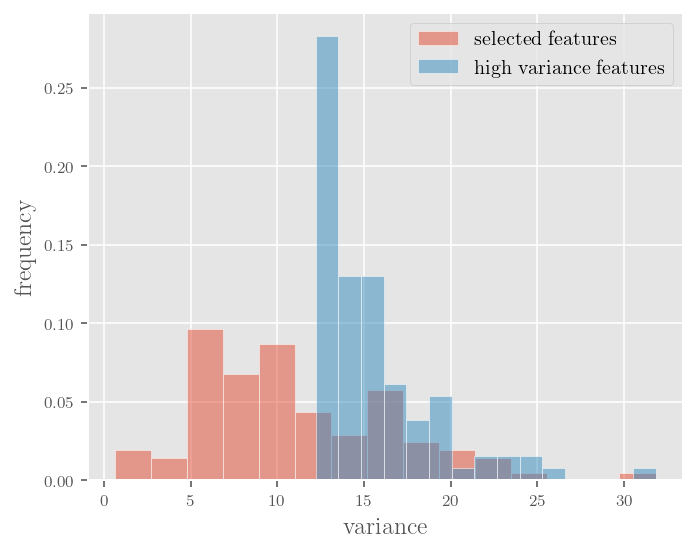

In [35]:
plot_style["figure.figsize"] = '5, 4'
plt.style.use ('ggplot')                      # emulate ggplot style
plt.rcParams.update(plot_style)

plt.hist(features_selected, alpha=0.5, bins=15, label='selected features', edgecolor='white', density=True)
plt.hist(features_hv, alpha=0.5, bins=15, label='high variance features',  edgecolor='white', density=True)
plt.xlabel('variance')
plt.ylabel('frequency')


plt.legend()
plt.tight_layout();

plt.savefig(f'selected_features_vs_high_variance_features.pdf')

In [36]:
np.mean(features_selected), np.var(features_selected)


(11.086624845046579, 32.13020959047491)

In [37]:
np.mean(features_hv), np.var(features_hv)

(15.57274070755084, 12.385833302493788)

In [38]:
model = LogisticRegression(penalty='l1',
                            C=0.1,  
                            solver='liblinear',  
                            multi_class='ovr')

model.fit(X_hv_train, y_train)
y_pred = model.predict(X_hv_test)
accuracy_hv = accuracy_score(y_test, y_pred)
round(1 - accuracy_hv, 5)

train_accuracy = accuracy_score(y_train, model.predict(X_hv_train))
round(train_accuracy, 5)

0.9805

In [39]:
features_rand_idx = np.random.randint(0, d, 100)

X_rand_train = X_train[:, features_rand_idx ]
X_rand_test = X_test[:, features_rand_idx ]

In [40]:
model = LogisticRegression(penalty='l1',
                            C=0.1,  
                            solver='liblinear',  
                            multi_class='ovr')

model.fit(X_rand_train, y_train)
y_pred = model.predict(X_rand_test)
accuracy_rand = accuracy_score(y_test, y_pred)
round(1-accuracy_rand, 5)


train_accuracy = accuracy_score(y_train, model.predict(X_rand_train))
round(train_accuracy, 5)

0.72981

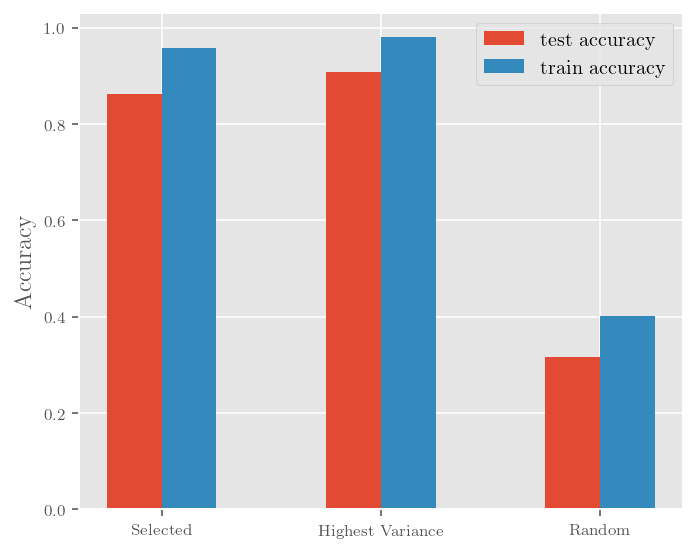

In [42]:
plt.bar([1, 2, 3], [score['test'][0], 0.90884, 0.31588], width=0.25, label='test accuracy',  )
plt.bar([1.25, 2.25, 3.25], [score['train'][0], 0.9805, 0.40204], width=0.25, label='train accuracy' )
plt.xticks([1.125, 2.125, 3.125], ['Selected', 'Highest Variance', 'Random'])
plt.legend()
plt.ylabel('Accuracy')
plt.tight_layout();

plt.savefig(f'feature_performace_comparison_barplot.pdf')